In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

#supress the warning
import warnings
warnings.filterwarnings("ignore")


# 🛒 E-commerce Sales Dashboard

## Problem
The dataset contains online retail transactions, but it was noisy with missing values, duplicates, and unstructured data.  
The goal was to clean the dataset and extract actionable insights for business decisions.

## Analysis
1. Cleaned dataset by removing nulls (CustomerID), duplicates, and fixing datatypes.  
2. Created new metrics such as `TotalAmount = Quantity * UnitPrice`.  
3. Aggregated sales data by product, country, and time.  
4. Built key visualizations:
   - **Top 10 Products by Revenue** (bar chart)  
   - **Monthly Revenue Trend** (line chart)  
   - **Top 5 Countries by Revenue** (bar chart)  
   - **Customer Segmentation (Frequent vs One-Time Buyers)(pie chart)  
5. Generated key KPIs: Total Revenue, Customer Count, Top Country.

## Insights
- Sales are concentrated in a few **high-performing products**.  
- **UK dominates sales**, followed by a handful of countries.  
- Clear **monthly seasonality trends** are visible in revenue.  
- Large proportion of customers are **Regular buyers**, indicating opportunity for retention strategies.


In [3]:
df = pd.read_csv('data.csv', encoding='windows-1252')

In [4]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [5]:
print("Shape:", df.shape)

Shape: (541909, 8)


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [7]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [8]:
#checking missing values

df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [9]:
#drop rows with missing Customer id's
df = df.dropna(subset=['CustomerID'])

In [10]:
print("Duplicates before:", df.duplicated().sum())

Duplicates before: 5225


In [11]:
df = df.drop_duplicates()
print("Duplicates after:", df.duplicated().sum())

Duplicates after: 0


In [12]:
# Convert InvoiceDate to datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

df["Quantity"] = pd.to_numeric(df["Quantity"], errors="coerce")
df["UnitPrice"] = pd.to_numeric(df["UnitPrice"], errors="coerce")

# Create TotalAmount = Quantity × UnitPrice
df['TotalAmount'] = df['Quantity'] * df['UnitPrice']


In [13]:
# Final check
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalAmount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [14]:
df.to_csv("ecommerce_transactions_cleaned.csv", index=False)

In [2]:
df = pd.read_csv("ecommerce_transactions_cleaned.csv")
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalAmount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [3]:
# Calculate total revenue per product
# Total revenue = sum of TotalPrice for each product
product_revenue = df.groupby("Description")["TotalAmount"].sum().sort_values(ascending=False)

# Display top 10 products
product_revenue.head(10)

Description
REGENCY CAKESTAND 3 TIER              132567.70
WHITE HANGING HEART T-LIGHT HOLDER     93767.80
JUMBO BAG RED RETROSPOT                83056.52
PARTY BUNTING                          67628.43
POSTAGE                                66710.24
ASSORTED COLOUR BIRD ORNAMENT          56331.91
RABBIT NIGHT LIGHT                     51042.84
CHILLI LIGHTS                          45915.41
PAPER CHAIN KIT 50'S CHRISTMAS         41423.78
PICNIC BASKET WICKER 60 PIECES         39619.50
Name: TotalAmount, dtype: float64

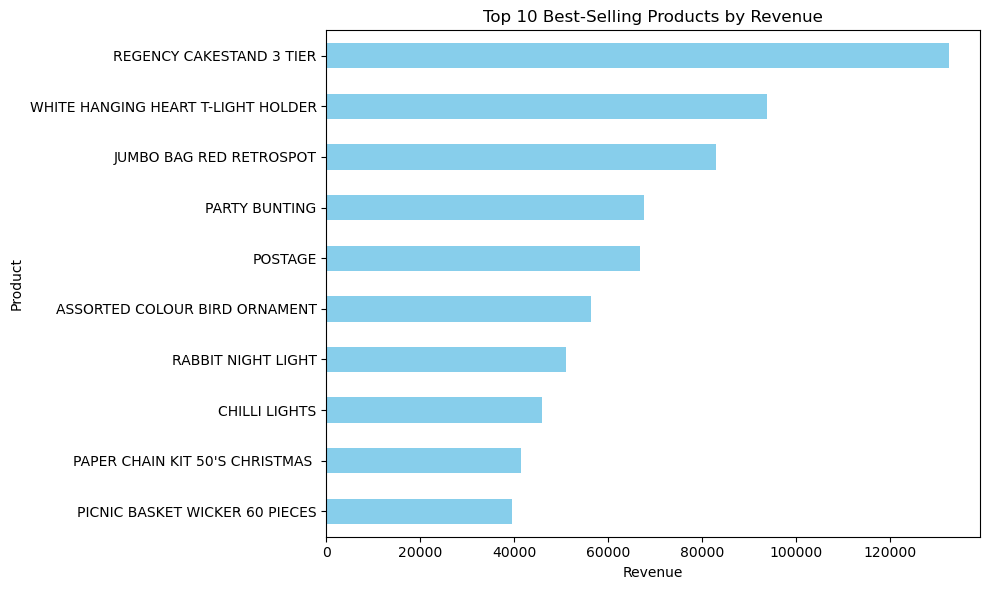

In [9]:

plt.figure(figsize=(10,6))
top10_products.plot(kind="barh", color="skyblue")
plt.title("Top 10 Best-Selling Products by Revenue")
plt.xlabel("Revenue")
plt.ylabel("Product")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.savefig("top10_products.png")
plt.show()

In [6]:
# Identify top 5 countries by sales
country_sales = df.groupby("Country")["TotalAmount"].sum().sort_values(ascending=False)

top_5_countries = country_sales.head(5)
top_5_countries

Country
United Kingdom    6747156.154
Netherlands        284661.540
EIRE               250001.780
Germany            221509.470
France             196626.050
Name: TotalAmount, dtype: float64

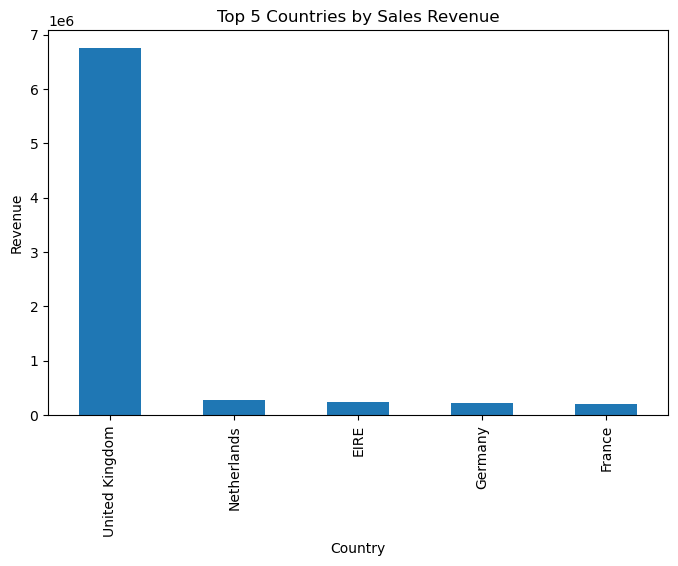

In [7]:
top_5_countries.plot(kind="bar", figsize=(8,5))
plt.title("Top 5 Countries by Sales Revenue")
plt.ylabel("Revenue")
plt.xlabel("Country")
plt.show()

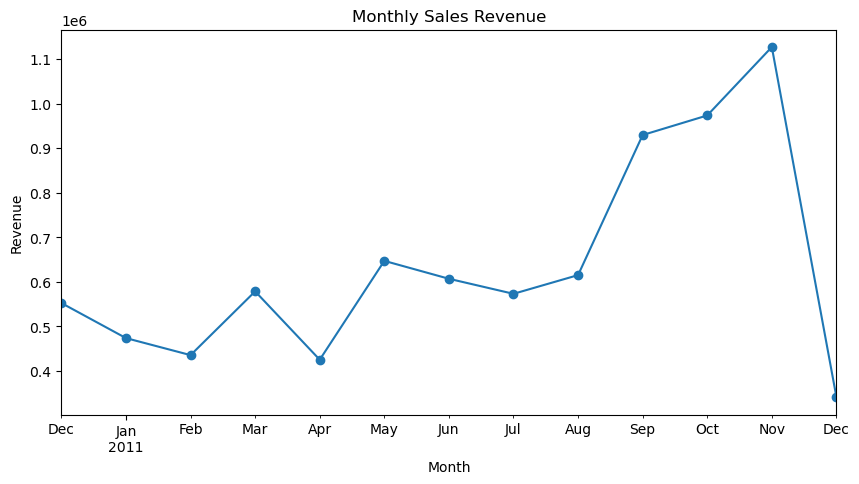

In [3]:
# Time-series chart of sales per month
# Extract month-year
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"], errors="coerce")

df["YearMonth"] = df["InvoiceDate"].dt.to_period("M")

# Group by month
monthly_sales = df.groupby("YearMonth")["TotalAmount"].sum()

# Plot
monthly_sales.plot(kind="line", marker="o", figsize=(10,5))
plt.title("Monthly Sales Revenue")
plt.ylabel("Revenue")
plt.xlabel("Month")
plt.show()

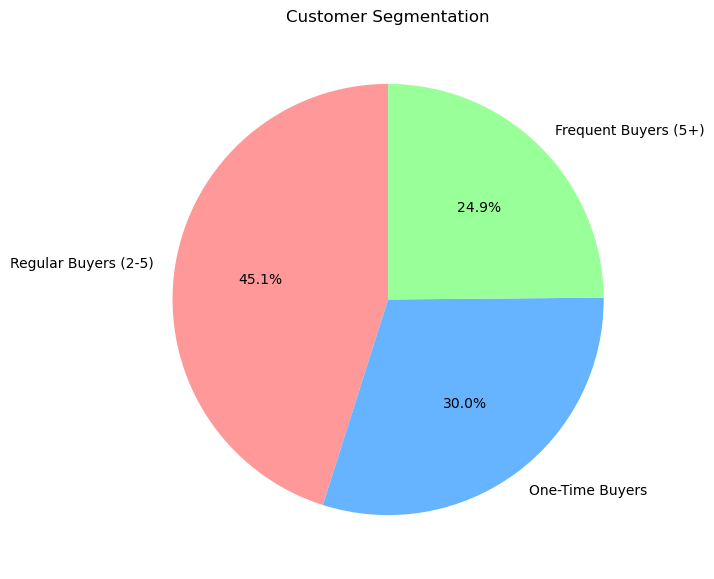

In [5]:
# Customer Segmentation (Frequent vs One-Time Buyers)
# Count number of purchases per customer
customer_orders = df.groupby("CustomerID")["InvoiceNo"].nunique()

# Define segments
segmentation = pd.cut(customer_orders, 
                      bins=[0, 1, 5, float("inf")], 
                      labels=["One-Time Buyers", "Regular Buyers (2-5)", "Frequent Buyers (5+)"])

# Count customers in each segment
segment_counts = segmentation.value_counts()

# Pie chart
plt.figure(figsize=(7,7))
segment_counts.plot(kind="pie", autopct="%1.1f%%", startangle=90, colors=["#ff9999","#66b3ff","#99ff99"])
plt.title("Customer Segmentation")
plt.ylabel("")  # Remove default ylabel
plt.show()


In [4]:
# Total revenue
total_revenue = df["TotalAmount"].sum()

# Total unique customers
total_customers = df["CustomerID"].nunique()

# Top country by revenue
top_country = df.groupby("Country")["TotalAmount"].sum().sort_values(ascending=False).idxmax()

print("📌 KPI Summary")
print(f"Total Revenue: {total_revenue:,.2f}")
print(f"Total Customers: {total_customers}")
print(f"Top Country by Revenue: {top_country}")

📌 KPI Summary
Total Revenue: 8,278,519.42
Total Customers: 4372
Top Country by Revenue: United Kingdom
